In [102]:
import numpy as np
import json
import sys
import os
import mayavi
import h5py
import matplotlib.pyplot as pltS
import matplotlib
import pandas as pd
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
rc('font', size=18)

with open('50/setup.json') as f:
    data = json.load(f)

input_path  = "inputs/"
case_list   = data["exec_list"]

# Plot 2 subfigures
## plot 50 data

In [103]:

ca = '50/'
# DTMOF
nn = h5py.File(ca+'MOFNN/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_nn50 = np.array(nn['phi'][str_frame])[12,:,:]
# BFGS
bfgs = h5py.File(ca+'MOFBFGS/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_bfgs50 = np.array(bfgs['phi'][str_frame])[12,:,:]
# ELVIRA
elvira = h5py.File(ca+'ELVIRA/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_elvira50 = np.array(elvira['phi'][str_frame])[12,:,:]
# exact
exact_data_file = input_path+"input50.h5"
init = h5py.File(exact_data_file,'r')
phi_init50 = np.transpose(np.array(init['phi']['init']))[:,:,12]
init.close()

x50,y50 =np.meshgrid(np.arange(50)+0.5/50.0,np.arange(50)+0.5/50.0)


# Plot 2 subfigures
## plot 50 data

In [350]:
ca = '50/'
# DTMOF
nn = h5py.File(ca+'MOFNN/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_nn50 = np.array(nn['phi'][str_frame])[12,:,:]
nn.close()
# BFGS
bfgs = h5py.File(ca+'MOFBFGS/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_bfgs50 = np.array(bfgs['phi'][str_frame])[12,:,:]
bfgs.close()
# ELVIRA
elvira = h5py.File(ca+'ELVIRA/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_elvira50 = np.array(elvira['phi'][str_frame])[12,:,:]
elvira.close()
# exact
exact_data_file = input_path+"input50.h5"
init = h5py.File(exact_data_file,'r')
phi_init50 = np.transpose(np.array(init['phi']['init']))[:,:,12]
init.close()

x50,y50 = np.meshgrid((np.arange(50)+0.5)/50.0,(np.arange(50)+0.5)/50.0)

## plot 100 data

In [351]:
ca = '100/'
# DTMOF
nn = h5py.File(ca+'MOFNN/visual.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_nn100 = np.array(nn['visual']['vis02'])[25,:,:]
nn.close()
# BFGS
bfgs = h5py.File(ca+'MOFBFGS/visual.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_bfgs100 = np.array(bfgs['visual']['vis02'])[25,:,:]
bfgs.close()
# ELVIRA
elvira = h5py.File(ca+'ELVIRA/visual.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_elvira100 = np.array(elvira['visual']['vis02'])[25,:,:]
elvira.close()
# exact
exact_data_file = input_path+"input100.h5"
init = h5py.File(exact_data_file,'r')
phi_init100 = np.transpose(np.array(init['phi']['init']))[:,:,25]
init.close()

x100,y100 = np.meshgrid((np.arange(100)+0.5)/100.0,(np.arange(100)+0.5)/100.0)


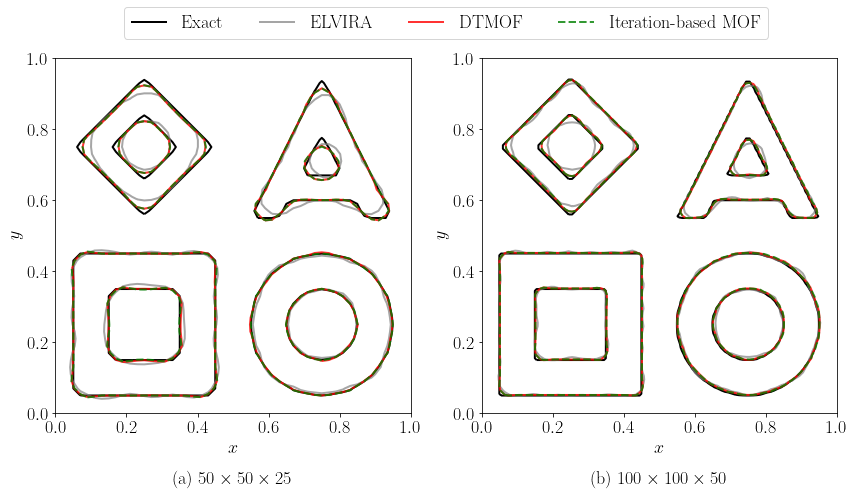

In [349]:
fig = plt.figure(figsize=[14,7])
ax1, ax2 = fig.subplots(1, 2)

# equivalent but more general
# ax1=plt.subplot(2,2,1)
# ax2=plt.subplot(2,2,2)

ax1.set_aspect(1)
ax2.set_aspect(1)

# plot
cs1 = ax1.contour(x50,y50,phi_init50,levels=[0.5],colors='k',linewidths=2)
cs2 = ax1.contour(x50,y50,np.transpose(phi_elvira50),levels=[0.5],colors='gray',linewidths=2,alpha=0.7)
cs3 = ax1.contour(x50,y50,np.transpose(phi_nn50),levels=[0.5],colors='r',linewidths=2,alpha=0.8)
cs4 = ax1.contour(x50,y50,np.transpose(phi_bfgs50),levels=[0.5],colors='g',linestyles='dashed',linewidths=2,alpha=0.8)

cs1 = ax2.contour(x100,y100,phi_init100,levels=[0.5],colors='k',linewidths=2)
cs2 = ax2.contour(x100,y100,np.transpose(phi_elvira100),levels=[0.5],colors='gray',linewidths=2,alpha=0.7)
cs3 = ax2.contour(x100,y100,np.transpose(phi_nn100),levels=[0.5],colors='r',linewidths=2,alpha=0.8)
cs4 = ax2.contour(x100,y100,np.transpose(phi_bfgs100),levels=[0.5],colors='g',linestyles='dashed',linewidths=2,alpha=0.8)

ax1.set_xbound([0,1])
ax1.set_ybound([0,1])
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.text(0.5, -0.2, r'(a) $50 \times 50 \times 25$',ha='center')

cs1.collections[0].set_label('Exact')
cs2.collections[0].set_label('ELVIRA')
cs3.collections[0].set_label('DTMOF')
cs4.collections[0].set_label('Iteration-based MOF')
ax2.set_xbound([0,1])
ax2.set_ybound([0,1])
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.text(0.5, -0.2, r'(b) $100 \times 100 \times 50$',ha='center')
ax2.legend(ncol=4,bbox_to_anchor=(-0.1, 1.1),loc='center')

plt.savefig('translation_slice.pdf',box_inches='tight')

# Visual 3D
use **vismayavi.py**

# Table data

In [362]:
cases = [
    "ELVIRA",
    "MOFBFGS",
    "MOFBFGSNUMERICAL",
    "MOFNN"
]

dat50 = np.zeros([4,8])
ii = 0
for case in cases:
    f=open('50/'+case+'/errors.dat')
    jj = 0
    for line in f:
        dat50[ii,jj] = float(line.split('=')[1])
        jj += 1
    ii += 1
dat100 = np.zeros([4,8])
ii = 0
for case in cases:
    f=open('100/'+case+'/errors.dat')
    jj = 0
    for line in f:
        dat100[ii,jj] = float(line.split('=')[1])
        jj += 1
    ii += 1
dat50[:,0] = dat50[:,0] / dat50[3,0]
dat100[:,0] = dat100[:,0] / dat100[3,0]
d50 = pd.DataFrame(dat50, 
                columns = ['time', 'Ec', 'Eg','mass', 'Ec1', 'Ec2', 'Ec3', 'Ec4'],
                index = ['ELVIRA', 'MOF', 'MOF2', 'DTMOF']
            )
d100 = pd.DataFrame(dat100, 
                columns = ['time', 'Ec', 'Eg','mass', 'Ec1', 'Ec2', 'Ec3', 'Ec4'],
                index = ['ELVIRA', 'MOF', 'MOF2', 'DTMOF']
            )

In [363]:
d50

,time,Ec,Eg,mass,Ec1,Ec2,Ec3,Ec4
ELVIRA,454.254489,0.137676,0.030035,3.735381e-15,0.114365,0.146140,0.237690,0.247848
MOF,52.836038,0.039734,0.008668,7.334093e-05,0.042290,0.026313,0.087426,0.072763
MOF2,3262.996467,0.039655,0.008651,2.934942e-15,0.042131,0.026313,0.087426,0.072762
DTMOF,3.988447,0.042395,0.009249,6.670324e-16,0.040276,0.034647,0.091461,0.076632


In [364]:
d100

,time,Ec,Eg,mass,Ec1,Ec2,Ec3,Ec4
ELVIRA,3748.288494,0.090645,0.019791,-8.531071e-15,0.073316,0.096665,0.166426,0.137208
MOF,970.534553,0.058365,0.012743,3.435063e-05,0.055698,0.056361,0.083807,0.076535
MOF2,28476.252168,0.058395,0.012750,-5.278600e-14,0.055752,0.056361,0.083806,0.076534
DTMOF,40.228216,0.059075,0.012898,-5.065323e-15,0.055792,0.057656,0.085447,0.077916


In [365]:
ca = '100/'
# DTMOF
nn = h5py.File(ca+'MOFNN/visual.h5','r')
exact3d_100 = np.array(nn['visual']['vis01'])
nn3d_100 = np.array(nn['visual']['vis02'])
nn.close()
# BFGS
bfgs = h5py.File(ca+'MOFBFGS/visual.h5','r')
mof3d_100 = np.array(bfgs['visual']['vis02'])
bfgs.close()
# BFGSNumerical
bfgs2 = h5py.File(ca+'MOFBFGSNUMERICAL/visual.h5','r')
mof3d2_100 = np.array(bfgs2['visual']['vis02'])
bfgs2.close()
# ELVIRA
elvira = h5py.File(ca+'ELVIRA/visual.h5','r')
elvira3d_100 = np.array(elvira['visual']['vis02'])
elvira.close()
# PLIC
plic = h5py.File(ca+'PLIC/visual.h5','r')
plic3d_100 = np.array(plic['visual']['vis02'])
plic.close()

v_cube = np.sum(exact3d_100[:,:50,:50])
e_cube = np.zeros(5)
e_cube[0] = np.sum(np.abs(plic3d_100[:,:50,:50]-exact3d_100[:,:50,:50])) / v_cube
e_cube[1] = np.sum(np.abs(elvira3d_100[:,:50,:50]-exact3d_100[:,:50,:50])) / v_cube
e_cube[2] = np.sum(np.abs(mof3d_100[:,:50,:50]-exact3d_100[:,:50,:50])) / v_cube
e_cube[3] = np.sum(np.abs(mof3d_100[:,:50,:50]-exact3d_100[:,:50,:50])) / v_cube
e_cube[4] = np.sum(np.abs(nn3d_100[:,:50,:50]-exact3d_100[:,:50,:50])) / v_cube
e_cube

v_sphere = np.sum(exact3d_100[:,50:,:50])
e_sphere = np.zeros(5)
e_sphere[0] = np.sum(np.abs(plic3d_100[:,50:,:50]-exact3d_100[:,50:,:50])) / v_sphere
e_sphere[1] = np.sum(np.abs(elvira3d_100[:,50:,:50]-exact3d_100[:,50:,:50])) / v_sphere
e_sphere[2] = np.sum(np.abs(mof3d_100[:,50:,:50]-exact3d_100[:,50:,:50])) / v_sphere
e_sphere[3] = np.sum(np.abs(mof3d_100[:,50:,:50]-exact3d_100[:,50:,:50])) / v_sphere
e_sphere[4] = np.sum(np.abs(nn3d_100[:,50:,:50]-exact3d_100[:,50:,:50])) / v_sphere

v_tcube = np.sum(exact3d_100[:,:50,:50])
e_tcube = np.zeros(5)
e_tcube[0] = np.sum(np.abs(plic3d_100[:,:50,50:]-exact3d_100[:,:50,50:])) / v_tcube
e_tcube[1] = np.sum(np.abs(elvira3d_100[:,:50,50:]-exact3d_100[:,:50,50:])) / v_tcube
e_tcube[2] = np.sum(np.abs(mof3d_100[:,:50,50:]-exact3d_100[:,:50,50:])) / v_tcube
e_tcube[3] = np.sum(np.abs(mof3d_100[:,:50,50:]-exact3d_100[:,:50,50:])) / v_tcube
e_tcube[4] = np.sum(np.abs(nn3d_100[:,:50,50:]-exact3d_100[:,:50,50:])) / v_tcube
e_tcube

v_la = np.sum(exact3d_100[:,50:,50:])
e_la = np.zeros(5)
e_la[0] = np.sum(np.abs(plic3d_100[:,50:,50:]-exact3d_100[:,50:,50:])) / v_la
e_la[1] = np.sum(np.abs(elvira3d_100[:,50:,50:]-exact3d_100[:,50:,50:])) / v_la
e_la[2] = np.sum(np.abs(mof3d_100[:,50:,50:]-exact3d_100[:,50:,50:])) / v_la
e_la[3] = np.sum(np.abs(mof3d_100[:,50:,50:]-exact3d_100[:,50:,50:])) / v_la
e_la[4] = np.sum(np.abs(nn3d_100[:,50:,50:]-exact3d_100[:,50:,50:])) / v_la

print(e_cube)
print(e_sphere)
print(e_tcube)
print(e_la)

[0.08061937 0.07331603 0.05569391 0.05569391 0.05579158]
[0.05095122 0.07664425 0.04639912 0.04639912 0.04765137]
[0.02475896 0.02772068 0.0139593  0.0139593  0.01423252]
[0.13079359 0.13720823 0.07653451 0.07653451 0.07791655]
